## K-Means Clustering
### https://gist.github.com/pb111/65dab4818f16ddb58bb6a18a3ba1785b
Implement K-Means clustering to find intrinsic groups within Facebook Live Sellers in Thailand dataset that display the same status_type behaviour.
The status_type behaviour variable consists of posts of a different nature (video, photos, statuses and links).

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Perormance Metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [133]:
# Dsplay pipelines
from sklearn import set_config
set_config(display="diagram")

In [134]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [135]:
# Data Import
df = pd.read_csv('../../../data/facebook_live_sellers_in_thailand.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [136]:
# Drop redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [97]:
# Drop status_id and status_published variable from the dataset
df.drop(['status_id', 'status_published'], axis=1, inplace=True)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [98]:
# view the labels in the variable
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

## Declare feature vector and target variable

In [99]:
X = df
y = df['status_type']

In [100]:
# Convert categorical variable into integers
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

## Feature Scaling

In [101]:
cols = X.columns

In [102]:
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [103]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## K-Means model with 2 clusters

In [104]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

## K-Means model parameters study

In [105]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [106]:
# inertia: or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
# The lower values of inertia are better and zero is optimal.
kmeans.inertia_

237.75726404419558

We can see that the model has very high inertia. So, this is not a good model fit to the data.

In [107]:
# The samples were correctly labeled
labels = kmeans.labels_
labels

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [108]:
y_pred = kmeans.predict(X)
df['cluster'] = y_pred

## Check quality of weak classification by the model

In [109]:
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


In [110]:
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(X, y_pred))
print("Silhouette Coefficient:", silhouette_score(X, y_pred))

Davies-Bouldin Index: 0.39739850431474066
Silhouette Coefficient: 0.7640959333166648


We have achieved a weak classification accuracy of 1% by our unsupervised model.

## Find the optimal number of clusters

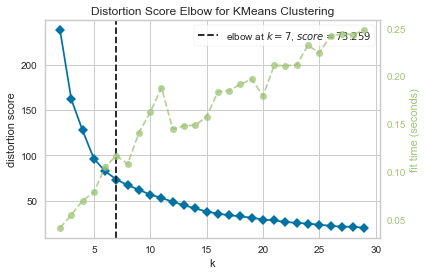

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [111]:
# Find the optimal number of clusters using the elbow method
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(X)
visualizer.show()

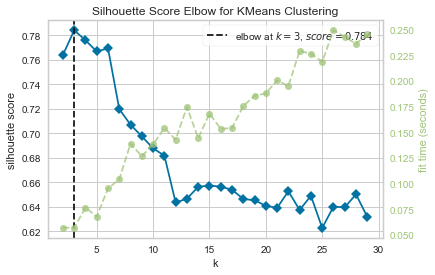

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
# Find the optimum number of clusters using the silhouette score
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

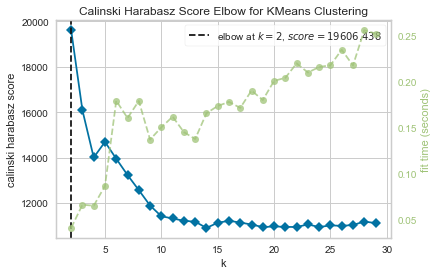

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [46]:
# Find the optimum number of clusters using the Calinski-Harabasz Index
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show()

## K-Means model with 3 clusters

In [112]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [113]:
kmeans.inertia_

161.59633400033601

In [114]:
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


In [115]:
y_pred = kmeans.predict(X)
df['cluster'] = y_pred

In [116]:
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(X, y_pred))
print("Silhouette Coefficient:", silhouette_score(X, y_pred))

Davies-Bouldin Index: 0.5931136986282223
Silhouette Coefficient: 0.7838777714764834


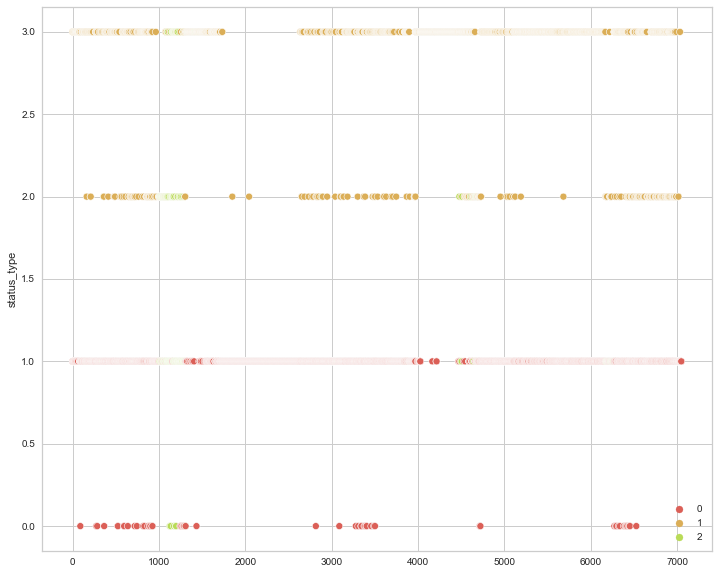

In [117]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x=df.index, y='status_type', hue=y_pred, palette=sns.color_palette("hls",10), legend="full")
plt.show()

## K-Means model with 4 clusters

In [118]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [119]:
kmeans.inertia_

127.31313212987797

In [120]:
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


In [121]:
y_pred = kmeans.predict(X)
df['cluster'] = y_pred

In [122]:
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(X, y_pred))
print("Silhouette Coefficient:", silhouette_score(X, y_pred))

Davies-Bouldin Index: 0.8746347821811786
Silhouette Coefficient: 0.7763534044364381


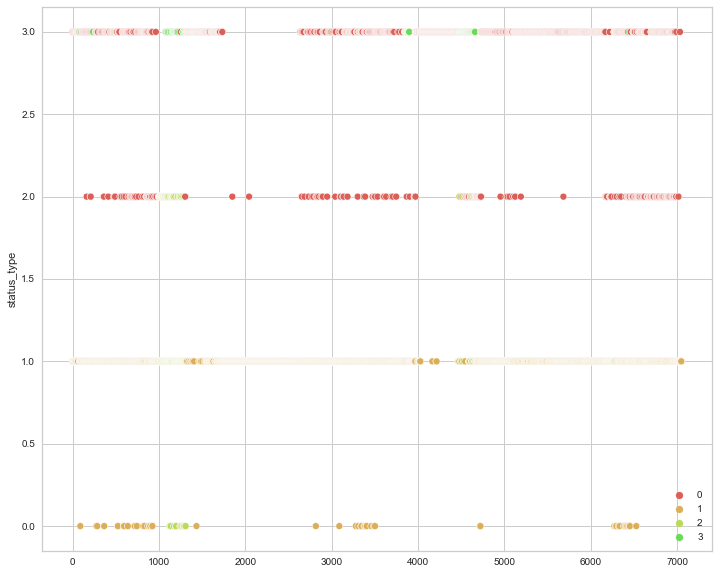

In [123]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x=df.index, y='status_type', hue=y_pred, palette=sns.color_palette("hls",10), legend="full")
plt.show()

We have achieved a relatively high accuracy of 62% with k=4.

## K-Means model with 5 clusters

In [124]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [125]:
kmeans.inertia_

96.24989550305204

In [126]:
# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 82 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


#### We can conclude that k=4 being the optimal number of clusters.

In [127]:
y_pred = kmeans.predict(X)

In [128]:
df['cluster'] = y_pred
df.head(10)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,3,529,512,262,432,92,3,1,1,0,1
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,1
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0
5,1,217,6,0,211,5,1,0,0,0,0
6,3,503,614,72,418,70,10,2,0,3,1
7,3,295,453,53,260,32,1,1,0,1,1
8,1,203,1,0,198,5,0,0,0,0,0
9,1,170,9,1,167,3,0,0,0,0,0


In [129]:
list(X.columns)

[('status_type',),
 ('num_reactions',),
 ('num_comments',),
 ('num_shares',),
 ('num_likes',),
 ('num_loves',),
 ('num_wows',),
 ('num_hahas',),
 ('num_sads',),
 ('num_angrys',)]

In [130]:
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(X, y_pred))
print("Silhouette Coefficient:", silhouette_score(X, y_pred))

Davies-Bouldin Index: 0.8044212249504064
Silhouette Coefficient: 0.7669770951371734


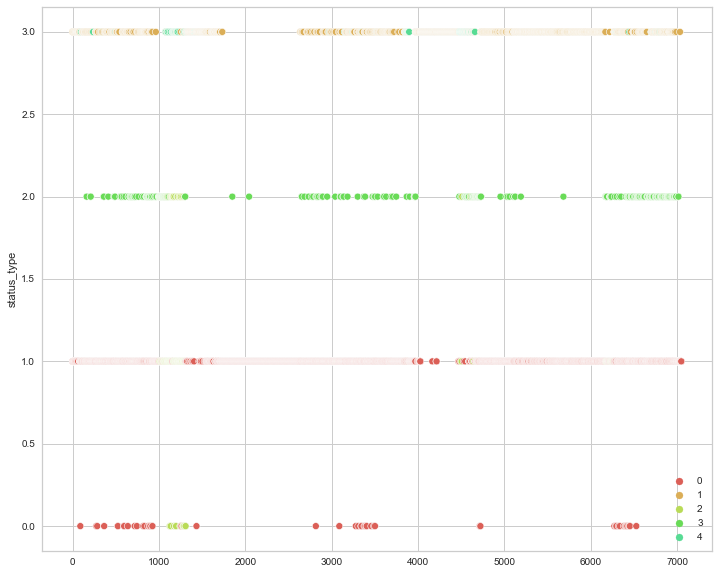

In [131]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x=df.index, y='status_type', hue=y_pred, palette=sns.color_palette("hls",10), legend="full")
plt.show()